6/4/2019

In [19]:
from __future__ import division
import os
import re
import itertools
import community
from datetime import datetime, timedelta
from sklearn import preprocessing
import imblearn
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler
folder_directory =os.getcwd()
os.chdir(folder_directory)
execfile('python_libraries.py')
execfile('LINK.py')
execfile('parsing.py')  # Sam Way's Code
execfile('.mixing.py')   # Sam Way's Code
execfile('create_adjacency_matrix.py')
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'invalid': 'ignore', 'over': 'warn', 'under': 'ignore'}

In [2]:
y_predict_type = 'gender' # gender

In [3]:
## 8/21/2018 - set up logforest model
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


percent_initially_unlabelled = [0.95,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05]
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)


In [4]:
school = 'Amherst41.csv' 

### Same Train School -- compare with different Test Schools (1x, 2x, 3x, max)

In [33]:
RF = True # else continues using LogForest models from earlier
undersampling = False

if RF:
    if undersampling:
        ## add in -- undersampling possibly
        max_depth = [3, 5, 10]
        max_depth.append(None)
        min_samples_leaf = [0.05, 0.1, 0.2]
        min_samples_split = [2, 3, 4, 5, 10]
        n_estimators = [50, 100, 150] #[10, 50, 100, 150, 200]
        max_features = ['auto', 0.25, 0.5, 0.75]
        random_grid = {'clf__max_depth': max_depth,
                     'clf__min_samples_leaf': min_samples_leaf,
                     'clf__max_features': max_features,
                      'clf__n_estimators': n_estimators,
                      'clf__min_samples_split': min_samples_split
        }

        clf = sklearn.ensemble.RandomForestClassifier()
        pipeline = imbPipeline([('undersample', imblearn.under_sampling.RandomUnderSampler(random_state=567)),
                                    #('oversample',imblearn.over_sampling.SMOTE()), 
                            ('clf',clf)])
        model1 = RandomizedSearchCV(estimator = pipeline,
                param_distributions = random_grid,
                cv = 3, verbose=0,
                n_jobs = 2)

        model2 = RandomizedSearchCV(estimator = pipeline,
                param_distributions = random_grid,
                cv = 3, verbose=0,
                n_jobs = 2)

        model3 = RandomizedSearchCV(estimator = pipeline,
                param_distributions = random_grid,
                cv = 3, verbose=0,
                n_jobs = 2)

        model = RandomizedSearchCV(estimator = pipeline,
                param_distributions = random_grid,
                cv = 3, verbose=0,
                n_jobs = 2)
    else:
        max_depth = [3, 5, 10]
        max_depth.append(None)
        min_samples_leaf = [1]#[0.05, 0.1, 0.2]
        min_samples_split = [2] #[2, 3, 4, 5, 10]
        n_estimators = [50, 100, 1000]#150]
        max_features = ['auto', 0.25, 0.5, 0.75]
        random_grid = {'max_depth': max_depth,
                        'min_samples_leaf': min_samples_leaf,
                        'max_features': max_features,
                        'n_estimators': n_estimators,
                        'min_samples_split': min_samples_split,
                       'class_weight': [{1:0.505, 1:50.5},{1:0.51, 1:25.5},{1:0.525, 1:10.5},{1:0.55, 1:5.5},{1:0.7, 1:1.75}]
                        }

        clf = sklearn.ensemble.RandomForestClassifier()
        model1 = RandomizedSearchCV(estimator = clf,
                                   param_distributions = random_grid,
                                   cv = 3, verbose=0, n_iter = 25,
                                   n_jobs = 2)

        model2 = RandomizedSearchCV(estimator = clf,
                                    param_distributions = random_grid,
                                    cv = 3, verbose=0, n_iter = 25,
                                    n_jobs = 2)
        model3 = RandomizedSearchCV(estimator = clf,
                                    param_distributions = random_grid,
                                    cv = 3, verbose=0, n_iter = 25,
                                    n_jobs = 2)
        model = RandomizedSearchCV(estimator = clf,
                                    param_distributions = random_grid,
                                    cv = 3, verbose=0, n_iter = 25,
                                    n_jobs = 2)

In [34]:
subset_schools = np.array(['Amherst41.csv',
                           'American75.csv',
                        'Berkeley13.csv',
                        'Brown11.csv',
                        'Carnegie49.csv',
                        'Columbia2.csv',
                        'Dartmouth6.csv',
                        'Emory27.csv',
                        'FSU53.csv',
                        'Georgetown15.csv',
                        'Mich67.csv',
                        'Michigan23.csv',
                        'MIT8.csv'])

In [35]:
train_school = 'Amherst41.csv' #'Amherst41.csv' 'MIT8.csv'

## train

## 3x
x_train = pd.read_csv('../../code/refex-rolx-master-3/sample-data/FB-data/out_union_0.50_FB_'+train_school+'-featureValues.csv', 
                      header = -1)
df_train = pd.DataFrame({'keys':np.array(map(np.int,x_train[0]))})
x_train = x_train.loc[:,1::] #drop IDs column
scaler.fit(x_train) #transform each feature on [0,1]-scale
x_train = scaler.transform(x_train)
y_train_y = pd.read_csv('../../data/FB100edges/'+re.sub('\\.csv','',train_school) + '_gender.csv')
y_train = df_train.merge(y_train_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')
x_train_m = pd.DataFrame(np.matrix(x_train))

model3.fit(x_train_m,
      y_train.gender_y)



## 2x
x_train = pd.read_csv('../../code/refex-rolx-master-2/sample-data/FB-data/out_union_0.50_FB_'+train_school+'-featureValues.csv', 
                      header = -1)
df_train = pd.DataFrame({'keys':np.array(map(np.int,x_train[0]))})
x_train = x_train.loc[:,1::] #drop IDs column
scaler.fit(x_train) #transform each feature on [0,1]-scale
x_train = scaler.transform(x_train)
y_train_y = pd.read_csv('../../data/FB100edges/'+re.sub('\\.csv','',train_school) + '_gender.csv')
y_train = df_train.merge(y_train_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')
x_train_m = pd.DataFrame(np.matrix(x_train))

model2.fit(x_train_m,
      y_train.gender_y)

## 1x
x_train = pd.read_csv('../../code/refex-rolx-master-1/sample-data/FB-data/out_union_0.50_FB_'+train_school+'-featureValues.csv', 
                      header = -1)
df_train = pd.DataFrame({'keys':np.array(map(np.int,x_train[0]))})
x_train = x_train.loc[:,1::] #drop IDs column
scaler.fit(x_train) #transform each feature on [0,1]-scale
x_train = scaler.transform(x_train)
y_train_y = pd.read_csv('../../data/FB100edges/'+re.sub('\\.csv','',train_school) + '_gender.csv')
y_train = df_train.merge(y_train_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')
x_train_m = pd.DataFrame(np.matrix(x_train))

model1.fit(x_train_m,
      y_train.gender_y)



RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=25, n_jobs=2,
          param_distributions={'min_samples_leaf': [1], 'n_estimators': [50, 100, 1000], 'min_samples_split': [2], 'max_features': ['auto', 0.25, 0.5, 0.75], 'max_depth': [3, 5, 10, None], 'class_weight': [{1: 50.5}, {1: 25.5}, {1: 10.5}, {1: 5.5}, {1: 1.75}]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [36]:

## all
x_train = pd.read_csv('../../code/refex-rolx-master/sample-data/FB-data/out_union_0.50_FB_'+train_school+'-featureValues.csv', 
                      header = -1)
df_train = pd.DataFrame({'keys':np.array(map(np.int,x_train[0]))})
x_train = x_train.loc[:,1::] #drop IDs column
scaler.fit(x_train) #transform each feature on [0,1]-scale
x_train = scaler.transform(x_train)
y_train_y = pd.read_csv('../../data/FB100edges/'+re.sub('\\.csv','',train_school) + '_gender.csv')
y_train = df_train.merge(y_train_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')
x_train_m = pd.DataFrame(np.matrix(x_train))


model.fit(x_train_m,
      y_train.gender_y)


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=25, n_jobs=2,
          param_distributions={'min_samples_leaf': [1], 'n_estimators': [50, 100, 1000], 'min_samples_split': [2], 'max_features': ['auto', 0.25, 0.5, 0.75], 'max_depth': [3, 5, 10, None], 'class_weight': [{1: 50.5}, {1: 25.5}, {1: 10.5}, {1: 5.5}, {1: 1.75}]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [37]:
test_school_array = []

accuracy_record1 = []
auc_record1 = []

accuracy_record2 = []
auc_record2 = []

accuracy_record3 = []
auc_record3 = []

accuracy_record = []
auc_record = []

accuracy_record_baseline = []
auc_record_baseline = []

for test_school in subset_schools:
    print 'train school: ', train_school
    print 'test school: ', test_school
    print ''
    test_school_array.append(test_school)

    ## all
    x_test = pd.read_csv('../../code/refex-rolx-master/sample-data/FB-data/out_union_0.50_FB_'+test_school+'-featureValues.csv', 
                         header = -1)
    df_test = pd.DataFrame({'keys':np.array(map(np.int,x_test[0]))})#np.sort(np.unique(np.concatenate((test[0], test[1]))))})
    x_test = x_test.loc[:,1::] #drop IDs column
    scaler.fit(x_test) #transform each feature on [0,1]-scale
    x_test = scaler.transform(x_test)
    y_test_y = pd.read_csv('../../data/FB100edges/'+re.sub('\\.csv','',test_school) + '_gender.csv')
    x_train_names = pd.read_csv('../../code/refex-rolx-master/sample-data/FB-data/union_unique_featureNames.csv')
    x_test_names = pd.read_csv('../../code/refex-rolx-master/sample-data/FB-data/union_unique_featureNames.csv')
    y_test = df_test.merge(y_test_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')
    x_test_m = pd.DataFrame(np.matrix(x_test))

    #all
    y_predict_refex = model.predict(x_test_m)
    accuracy_record.append(np.mean(np.array(y_test.gender_y) == np.array(y_predict_refex)))
    y_predict_refex = model.predict_proba(x_test_m)[:,1]
    auc_record.append(metrics.roc_auc_score(label_binarize(y_test.gender_y,np.unique(y_test.gender_y)),
                                         y_predict_refex,average='weighted'))
    

    
    #baseline
    num1 = np.sum(y_train.gender_y==np.max(y_train.gender_y))
    num0 = np.sum(y_train.gender_y==np.min(y_train.gender_y))
    if num1 > num0:
        label = 1
    else:
        label = 0


    y_predict = np.repeat(label,len(y_test))
    y_true = np.array(y_test.gender_y)

    accuracy_record_baseline.append(np.mean(y_true == y_predict))
    auc_record_baseline.append(metrics.roc_auc_score(label_binarize(y_true,np.unique(y_true)),
                                                                        y_predict,average='weighted'))
    
    ## 1x
    x_test = pd.read_csv('../../code/refex-rolx-master-1/sample-data/FB-data/out_union_0.50_FB_'+test_school+'-featureValues.csv', 
                         header = -1)
    df_test = pd.DataFrame({'keys':np.array(map(np.int,x_test[0]))})#np.sort(np.unique(np.concatenate((test[0], test[1]))))})
    x_test = x_test.loc[:,1::] #drop IDs column
    scaler.fit(x_test) #transform each feature on [0,1]-scale
    x_test = scaler.transform(x_test)
    y_test_y = pd.read_csv('../../data/FB100edges/'+re.sub('\\.csv','',test_school) + '_gender.csv')
    x_train_names = pd.read_csv('../../code/refex-rolx-master-1/sample-data/FB-data/union_unique_featureNames.csv')
    x_test_names = pd.read_csv('../../code/refex-rolx-master-1/sample-data/FB-data/union_unique_featureNames.csv')
    y_test1 = df_test.merge(y_test_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')
    x_test_m1 = pd.DataFrame(np.matrix(x_test))

    #1x
    y_predict_refex1 = model1.predict(x_test_m1)
    accuracy_record1.append(np.mean(np.array(y_test1.gender_y) == np.array(y_predict_refex)))
    y_predict_refex = model1.predict_proba(x_test_m1)[:,1]
    auc_record1.append(metrics.roc_auc_score(label_binarize(y_test1.gender_y,np.unique(y_test1.gender_y)),
                                         y_predict_refex,average='weighted'))
    
    ## 2x
    x_test = pd.read_csv('../../code/refex-rolx-master-2/sample-data/FB-data/out_union_0.50_FB_'+test_school+'-featureValues.csv', 
                         header = -1)
    df_test = pd.DataFrame({'keys':np.array(map(np.int,x_test[0]))})#np.sort(np.unique(np.concatenate((test[0], test[1]))))})
    x_test = x_test.loc[:,1::] #drop IDs column
    scaler.fit(x_test) #transform each feature on [0,1]-scale
    x_test = scaler.transform(x_test)
    y_test_y = pd.read_csv('../../data/FB100edges/'+re.sub('\\.csv','',test_school) + '_gender.csv')
    x_train_names = pd.read_csv('../../code/refex-rolx-master-2/sample-data/FB-data/union_unique_featureNames.csv')
    x_test_names = pd.read_csv('../../code/refex-rolx-master-2/sample-data/FB-data/union_unique_featureNames.csv')
    y_test2 = df_test.merge(y_test_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')
    x_test_m2 = pd.DataFrame(np.matrix(x_test))

    #2x
    y_predict_refex2= model2.predict(x_test_m2)
    accuracy_record2.append(np.mean(np.array(y_test2.gender_y) == np.array(y_predict_refex)))
    y_predict_refex = model2.predict_proba(x_test_m2)[:,1]
    auc_record2.append(metrics.roc_auc_score(label_binarize(y_test2.gender_y,np.unique(y_test2.gender_y)),
                                         y_predict_refex,average='weighted'))

    
    # 3x
    x_test = pd.read_csv('../../code/refex-rolx-master-3/sample-data/FB-data/out_union_0.50_FB_'+test_school+'-featureValues.csv', 
                         header = -1)
    df_test = pd.DataFrame({'keys':np.array(map(np.int,x_test[0]))})#np.sort(np.unique(np.concatenate((test[0], test[1]))))})
    x_test = x_test.loc[:,1::] #drop IDs column
    scaler.fit(x_test) #transform each feature on [0,1]-scale
    x_test = scaler.transform(x_test)
    y_test_y = pd.read_csv('../../data/FB100edges/'+re.sub('\\.csv','',test_school) + '_gender.csv')
    x_train_names = pd.read_csv('../../code/refex-rolx-master-3/sample-data/FB-data/union_unique_featureNames.csv')
    x_test_names = pd.read_csv('../../code/refex-rolx-master-3/sample-data/FB-data/union_unique_featureNames.csv')
    y_test3 = df_test.merge(y_test_y[['keys','gender_y']],
        how = 'left',
        on = 'keys')
    x_test_m3 = pd.DataFrame(np.matrix(x_test))

    # 3x
    y_predict_refex3= model3.predict(x_test_m3)
    accuracy_record3.append(np.mean(np.array(y_test3.gender_y) == np.array(y_predict_refex)))
    y_predict_refex = model3.predict_proba(x_test_m3)[:,1]
    auc_record3.append(metrics.roc_auc_score(label_binarize(y_test3.gender_y,np.unique(y_test3.gender_y)),
                                         y_predict_refex,average='weighted'))


train school:  Amherst41.csv
test school:  Amherst41.csv

train school:  Amherst41.csv
test school:  American75.csv

train school:  Amherst41.csv
test school:  Berkeley13.csv

train school:  Amherst41.csv
test school:  Brown11.csv

train school:  Amherst41.csv
test school:  Carnegie49.csv

train school:  Amherst41.csv
test school:  Columbia2.csv

train school:  Amherst41.csv
test school:  Dartmouth6.csv

train school:  Amherst41.csv
test school:  Emory27.csv

train school:  Amherst41.csv
test school:  FSU53.csv

train school:  Amherst41.csv
test school:  Georgetown15.csv

train school:  Amherst41.csv
test school:  Mich67.csv

train school:  Amherst41.csv
test school:  Michigan23.csv

train school:  Amherst41.csv
test school:  MIT8.csv



In [38]:
subset_schools_new = [w.replace('.csv','') for w in subset_schools]

In [39]:
subset_schools_new

['Amherst41',
 'American75',
 'Berkeley13',
 'Brown11',
 'Carnegie49',
 'Columbia2',
 'Dartmouth6',
 'Emory27',
 'FSU53',
 'Georgetown15',
 'Mich67',
 'Michigan23',
 'MIT8']

In [41]:
school_names = ['Amherst',
               'American',
               'Berkeley',
                'Brown',
               'Carnegie',
               'Columbia',
               'Dartmouth',
               'Emory',
               'FSU',
               'Georgetown',
               'Mich',
               'Michigan',
               'MIT']
len(school_names)

13

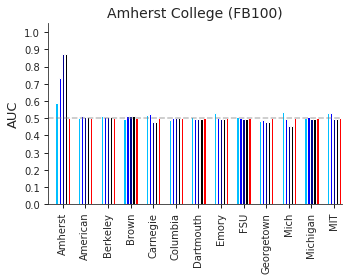

In [42]:
from matplotlib.backends.backend_pdf import PdfPages

alpha_empirical = 0.4

%matplotlib inline
nbins = 45
f, (ax1) = plt.subplots(1, 1, 
                    sharey=False, sharex=False,
                figsize=(5,4))#(5, 4))
plt.setp(ax1, xticks=[ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15., 16.5, 18], 
         xticklabels=school_names)#subset_schools_new)
plt.setp(ax1.get_xticklabels(), 
         rotation=90, size = 10)
plt.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)


ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)

w = 1.5
width = 0.15
ax1.bar(np.array(range(len(auc_record_baseline)))*w+0.4,auc_record_baseline, color = 'red', #alpha = 0.5,
       width = width, edgecolor = 'white')

ax1.bar(np.array(range(len(auc_record1)))*w-0.4,auc_record1, color = 'deepskyblue',# alpha = 0.5,
       width = width, edgecolor = 'white')

ax1.bar(np.array(range(len(auc_record2)))*w-0.2,auc_record2, color = 'blue', #alpha = 0.5,
       width = width, edgecolor = 'white')

ax1.bar(np.array(range(len(auc_record3)))*w-0,auc_record3, color = 'darkblue', #alpha = 0.5,
       width = width, edgecolor = 'white')

ax1.bar(np.array(range(len(auc_record3)))*w+0.2,auc_record3, color = 'black', #alpha = 0.5,
       width = width, edgecolor = 'white')
ax1.set_ylabel('AUC', size=13)

ax1.set_ylim(0,1.05)
plt.yticks(np.arange(0,1.1,0.1))
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_xlim(-1,18.5)
#ax1.set_title(train_school)
ax1.set_title(train_school, size = 10)
#ax1.annotate('ReFeX 1x', xy=(-0.5,1.03), 
#                 color='deepskyblue', alpha=1, size=7)
#ax1.annotate('ReFeX 2x', xy=(-0.5,1.03-0.05), 
#                 color='blue', alpha=1, size=7)
#ax1.annotate('ReFeX 3x', xy=(-0.5,1.03-0.05*2), 
#                 color='darkblue', alpha=1, size=7)
#ax1.annotate('ReFeX max', xy=(-0.5,1.03-0.05*3), 
#                 color='black', alpha=1, size=7)
#ax1.annotate('Baseline', xy=(2.5,1.03), 
#                 color='red', alpha=1, size=7)

if train_school=='MIT8.csv':
    plt.title('MIT (FB100)',fontsize=14)

if train_school=='Amherst41.csv':
    plt.title('Amherst College (FB100)',fontsize=14)
plt.tight_layout()


if RF:
    if undersampling:
        pp = PdfPages('../figs/' + train_school + '_NEWAUC_across_RF_undersampling.pdf')
    else:
        pp = PdfPages('../figs/' + train_school + '_NEWAUC_across_RF.pdf')
pp.savefig()
pp.close()